<a href="https://colab.research.google.com/github/llaygh/T5_camp_Amany/blob/main/Amany_Task_2_Convolutional_Neural_Networks_(CNN)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [4]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Traffic_Signs.zip, Traffic_Signs.zip.zip or Traffic_Signs.zip.ZIP.


In [3]:
!pip install split-folders

In [7]:
!unzip '/content/Traffic_Signs.zip'

Streaming output truncated to the last 5000 lines.
 extracting: Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00013.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00006.png  
  inflating: Traffi

In [8]:
import splitfolders
image_directory = '/content/Traffic_Signs/Dataset'
splitfolders.ratio(image_directory,output='traffic-ds-split', seed=42 , ratio=(0.7,0.15,0.15), group_prefix=None,move=False)

Copying files: 39209 files [00:05, 6677.39 files/s]


## Import Libraries

In [9]:
!pip install tensorflow

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [11]:

# Set paths
train_dir = '/content/traffic-ds-split/train'
val_dir = '/content/traffic-ds-split/val'
test_dir = '/content/traffic-ds-split/test'

# Define image parameters
img_height, img_width = 150, 150
batch_size = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
# for evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 27439 images belonging to 43 classes.
Found 5872 images belonging to 43 classes.
Found 5898 images belonging to 43 classes.


## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [ ]:
# i have done it before

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [12]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout

In [21]:
model = models.Sequential()

    # Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
    # Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
    # Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
    # Flatten Layer
model.add(layers.Flatten())

    #Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

    # Output Layer
model.add(layers.Dense(43, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           2,795 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,839,403 (18.46 MB)

 Trainable params: 4,839,403 (18.46 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


857/857 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.4022 - loss: 2.1536 - val_accuracy: 0.9037 - val_loss: 0.3458
Epoch 2/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9062 - loss: 0.3670

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


857/857 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9062 - loss: 0.3670 - val_accuracy: 1.0000 - val_loss: 0.1039
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 62s 31ms/step - accuracy: 0.9162 - loss: 0.2789 - val_accuracy: 0.9496 - val_loss: 0.1810
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.9688 - loss: 0.4009 - val_accuracy: 1.0000 - val_loss: 0.0516
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9629 - loss: 0.1245 - val_accuracy: 0.9739 - val_loss: 0.1081
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0313 - val_accuracy: 1.0000 - val_loss: 0.0163
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9735 - loss: 0.0833 - val_accuracy: 0.9664 - val_loss: 0.1238
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.3066 - val_accuracy: 1.0000 - val_loss: 4.7667e-04
Epoch 9/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.9750 - loss: 0.0821 - val_accuracy: 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [28]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9730 - loss: 0.1035
Test accuracy: 0.97


## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [29]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1S_vpQntND9839x8kJpegaEgtSIA4JxHO

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Test_Dataset.zip, Test_Dataset.zip.zip or Test_Dataset.zip.ZIP.


In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [39]:

# Load an image for prediction
img_path = '/content/traffic-ds-split/test/13/00013_00000_00001.png'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0  # Rescale
img_array = np.expand_dims(img_array, axis=0)  # batch dimension

# Predict
prediction = model.predict(img_array)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
[[1.6128950e-04 2.7737981e-03 1.2041862e-04 2.8869668e-05 4.1348883e-03
  5.7592261e-01 4.7915888e-05 2.9240001e-02 7.5835094e-05 1.9004928e-03
  1.5433277e-03 4.7547201e-04 4.9049929e-02 1.9334566e-03 2.0034820e-06
  4.3526036e-04 1.3521267e-05 1.7027178e-05 2.1147623e-03 1.3322573e-05
  2.3094302e-07 1.9175334e-04 6.7357403e-05 1.6868140e-01 1.0358700e-04
  3.6287337e-04 3.4862805e-02 5.3180405e-03 1.0601140e-02 1.7114993e-02
  4.6438780e-02 1.8600852e-04 8.6863246e-03 1.7981119e-04 2.8459035e-02
  1.4052300e-04 8.4775267e-04 1.1573704e-05 3.9112791e-03 2.1336597e-04
  4.2548199e-05 1.6780398e-03 1.8965794e-03]]


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


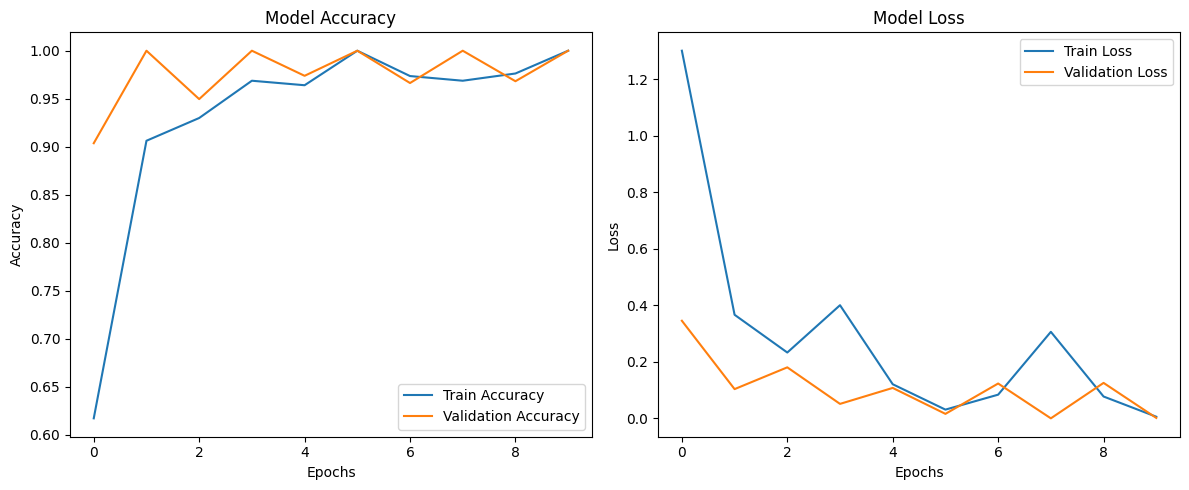

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [40]:
from pymongo import MongoClient

ModuleNotFoundError: No module named 'pymongo'

In [ ]:
client = MongoClient('')
db = client['TEST00']
collection = db['ANN_model']

In [ ]:
model_bytes = pickle.dumps(model)

# Store the model in the collection
model_document = {
    'model_name': 'CNN',
    'model_data': model_bytes
}
collection.insert_one(model_document)
print("Model successfully saved to MongoDB")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: